<a href="https://colab.research.google.com/github/sightes/COFFETALKS/blob/main/Clase_22_Coderhouse_DS_Clase_Ejemplo_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Caso de Estudio  01**
Se entrega el siguiente set de datos de una empresa del sector financiero, 

*   BankMarketing.csv, el cual es un dataset que cuenta con las principales características de una entidad financiera respecto a sus campañas y estrategias para mejorar en las próximas campañas de marketing la aceptación de los productos pasivos.

*   En los últimos 6 meses el indicador de efectividad (e = (Venta/Base)*100%) ha decrementado considerablemente, yendo de 12% a 8% de efectividad lo que no está permitiendo a los ejecutivos comerciales poder cobrar sus bonos variables ¿Cómo puede la institución financiera tener una mayor efectividad para futuras campañas de marketing?

*   Para responder a esto, tenemos que analizar la última campaña de marketing que realizó el banco e identificar los patrones que nos ayudarán a encontrar conclusiones para desarrollar estrategias futuras y mejorar el KPI de efectividad.
---

# Las variables que se disponibilizan son:

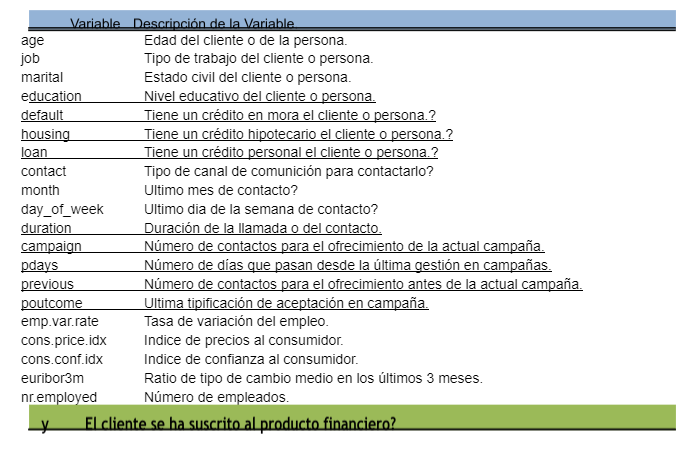


# ORIGEN DATA : https://archive.ics.uci.edu/ml/datasets/Bank%2BMarketing
# KAGGLE DATA :https://www.kaggle.com/henriqueyamahata/bank-marketing/code

In [3]:
#Descargamos los datos desde el Drive
!wget "https://drive.google.com/u/2/uc?id=1C-m8xMV61MNJE0yzSuDDQDEBRwY1o625&export=download" -O BankMarketing.csv
#LIBRERIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import  StandardScaler
import sklearn.metrics as sk
#LECTURA DATOS
df=pd.read_csv('BankMarketing.csv',sep=';')
#df=df.isna().iloc[np.where(df.isna().age.values==True)]
df1=df.drop(columns=['day_of_week','month','contact','poutcome','pdays'],axis=1) #ELIMIAMOS COLUMNAS QUE SON IRRELEVANTES
#Reemplazando datos categoricos- binarios
df1.y.replace(('yes', 'no'), (1, 0), inplace=True)
df1.default.replace(('yes', 'no'), (1, 0), inplace=True)
df1.housing.replace(('yes', 'no'), (1, 0), inplace=True)
df1.loan.replace(('yes', 'no'), (1, 0), inplace=True)

#Creando variables dummies
df2 = pd.get_dummies(df1)

#Remuevo variables dummies que no funcionan
df3=df2#.drop(columns=['job_unknown','marital_divorced','education_unknown'],axis=1)
df3.describe().T #descriptivo

#Creando variable target binaria
df_target=df3[['y']].values
df_features=df3.drop(columns=['y'],axis=1).values

# creacion conjuntos entrenamiento test
x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.3, random_state = 0)
#escalamiento
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



--2022-01-31 21:30:06--  https://drive.google.com/u/2/uc?id=1C-m8xMV61MNJE0yzSuDDQDEBRwY1o625&export=download
Resolving drive.google.com (drive.google.com)... 142.250.153.102, 142.250.153.138, 142.250.153.101, ...
Connecting to drive.google.com (drive.google.com)|142.250.153.102|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1C-m8xMV61MNJE0yzSuDDQDEBRwY1o625&export=download [following]
--2022-01-31 21:30:06--  https://drive.google.com/uc?id=1C-m8xMV61MNJE0yzSuDDQDEBRwY1o625&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bth196ascetctpqciqms11unp5rc4fgn/1643664600000/18340134811011616317/*/1C-m8xMV61MNJE0yzSuDDQDEBRwY1o625?e=download [following]
--2022-01-31 21:30:07--  https://doc-10-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l

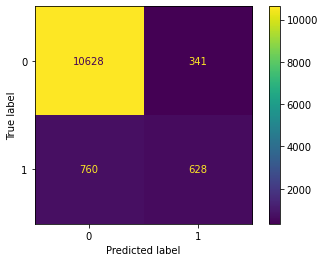

In [8]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,x_test, y_test)  
plt.show()
